# Task 3 - KMeans Clustering

# 1.Importing libraries and data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [2]:
data_iris=pd.read_csv('Iris.csv')
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 2.Data Cleaning

In the above datafram, the Id column is unnecessary and hence, we will drop it. More over, the word Iris has been repeated every time which provides no extra info.
Hence, we will try to remove the iris word from the Species column.

In [3]:
data_iris.drop('Id',axis=1,inplace=True)

In [4]:
data_split=data_iris['Species'].str.rsplit('-',expand=True)
data_iris.drop('Species',axis=1,inplace=True)

In [5]:
data_iris['Species']=data_split.iloc[:,-1]
data_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We have completely refined our data and can move forward with the KMeans clustering.

# 3.To perform Unsupervised Learning

#3.1 How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [6]:
from sklearn.cluster import KMeans

In [7]:
data_labels=data_iris['Species']
data_iris.drop('Species',axis=1,inplace=True)

In order to find the optimum number of clusters that give us a good idea of the separate labels that must be applied.
For this purpose, we use the famous Elbow technique that tells us how the Within Cluster sum of squares change. We want this value to be low which basically means that our centroid is now stable at a particular location. Let us perform this task.
We will try to check the WCSS values for a range of K number of clusters between 1-15.

In [8]:
wcss=[]
clusters=np.arange(1,16)
X=data_iris.values
for i in range(1,16):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

We have fitted our clusters ranging from K=1 to K=15. Let us plot the elbow diagram that will give 
us a clear idea of which K value is optimum for our analysis.

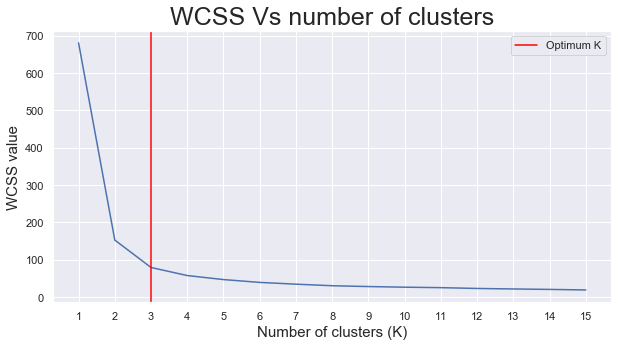

In [9]:
sns.set()
plt.figure(figsize=(10,5))
plt.title('WCSS Vs number of clusters',size=25)
plt.plot(clusters,wcss)
plt.axvline(3,color='red',label='Optimum K')
plt.xticks(np.arange(1,16))
plt.xlabel('Number of clusters (K)',size=15)
plt.ylabel('WCSS value',size=15)
plt.legend()

From the above elbow diagram, we see that the second bend on the diagram is at K=3. According to this analysis, K=3 should give us good results. This makes sense since in actual case, we have 3 unique species that we are gonna classify.

3.2 Applying Kmeans clustering and fitting our model

In [10]:
K=3
kmeans=KMeans(n_clusters=K)
kmeans.fit(X)
labels=kmeans.predict(X)
data_iris['Label']=labels

In [11]:
def sep_length_width(data):
    #Labelling o/p var with 0,1,2
    df_a=data[data['Label']==0]
    df_b=data[data['Label']==1]
    df_c=data[data['Label']==2]
    
    #scatter plot
    plt.figure(figsize=(10,8))
    plt.title('Species clustering based on Sepal width and length',size=20)
    plt.scatter(df_a.iloc[:,0],df_a.iloc[:,1],c='red',s=50,alpha=0.6,label='setosa')
    plt.scatter(df_b.iloc[:,0],df_b.iloc[:,1],c='blue',s=50,alpha=0.6,label='versicolour')
    plt.scatter(df_c.iloc[:,0],df_c.iloc[:,1],c='green',s=50,alpha=0.6,label='virginica')
    plt.xlabel('Sepal Length (cm)',size=15)
    plt.ylabel('Sepal Width (cm)',size=15)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')
    plt.legend()
    return

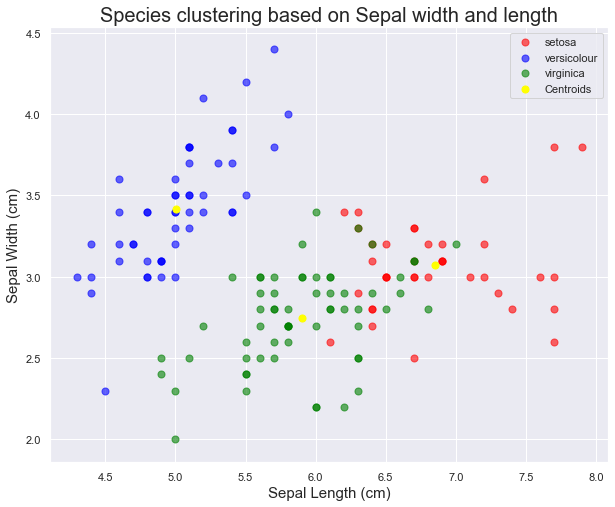

In [12]:
sep_length_width(data_iris)

In [13]:
def petal_length_width(data):
    #Labelling o/p var with 0,1,2
    df_a=data[data['Label']==0]
    df_b=data[data['Label']==1]
    df_c=data[data['Label']==2]
    
    #scatter plot
    plt.figure(figsize=(10,8))
    plt.title('Species clustering based on Petal length and petal width ',size=20)
    plt.scatter(df_a.iloc[:,2],df_a.iloc[:,3],c='red',s=50,alpha=0.6,label='Setosa')
    plt.scatter(df_b.iloc[:,2],df_b.iloc[:,3],c='blue',s=50,alpha=0.6,label='Versicolor')
    plt.scatter(df_c.iloc[:,2],df_c.iloc[:,3],c='green',s=50,alpha=0.6,label='Virginica')
    plt.xlabel('Petal Length (cm)',size=15)
    plt.ylabel('Petal Width (cm)',size=15)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')
    plt.legend()
    return

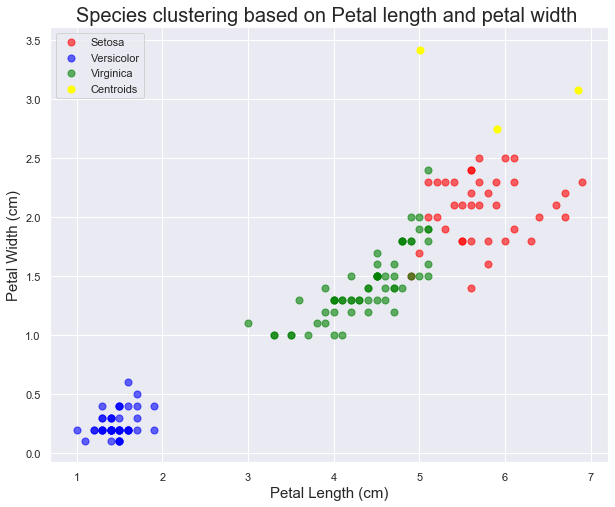

In [14]:
petal_length_width(data_iris)